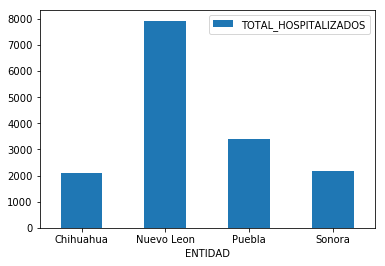

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

# Cargamos la informacion del archivo generado
dfCovidEstadosHospitalizados = pd.read_csv("tabla2.csv")

# Graficamos
ax = dfCovidEstadosHospitalizados.plot.bar(x='ENTIDAD', y='TOTAL_HOSPITALIZADOS', rot=0)
fig = ax.get_figure()
fig.savefig("grafica1.png")

In [36]:
dfCovid = pd.read_csv("covid-data/200511COVID19MEXICO.CSV")

# Filtramos los positivos a nivel nacional
dfCovidPositivo = dfCovid.query('RESULTADO == 1').copy()
dfCovidPositivo['FECHA_SINTOMAS'] = dfCovidPositivo['FECHA_SINTOMAS'].astype('datetime64[ns]')

fecha inicial : 2020-01-08 00:00:00 
fecha final : 2020-05-10 00:00:00


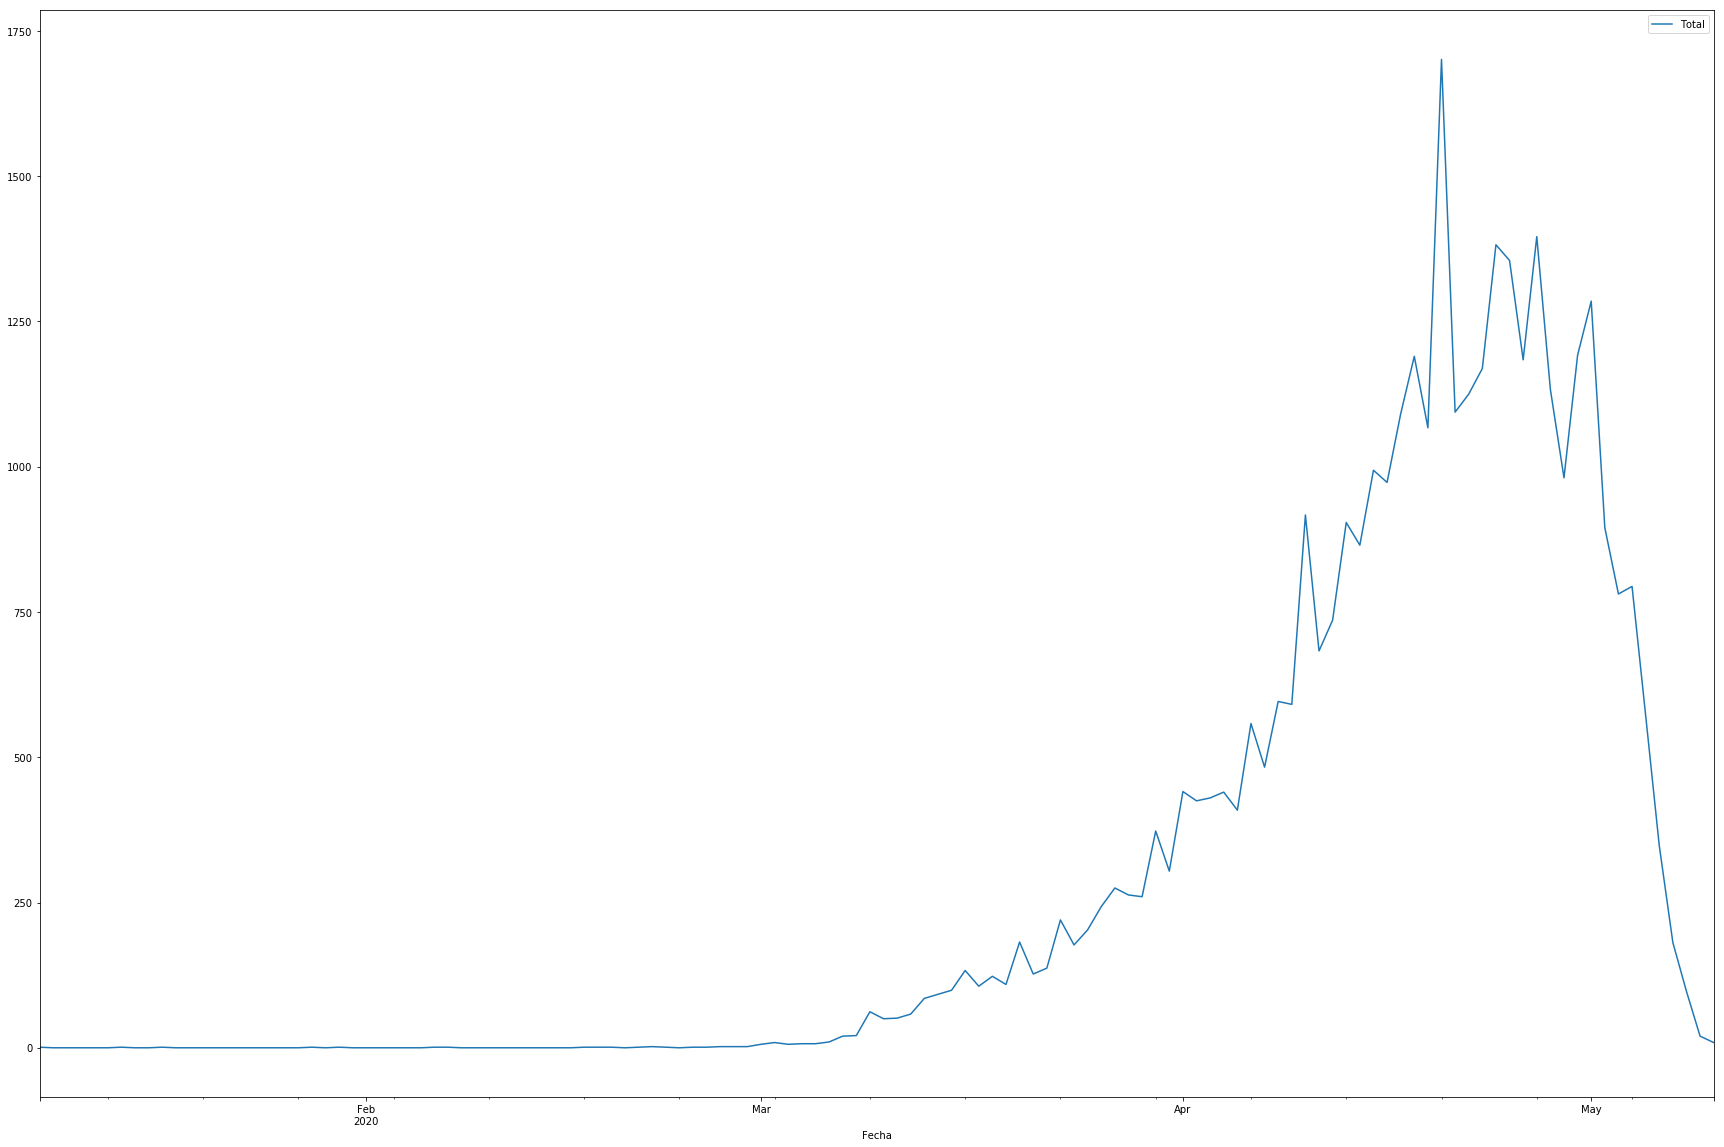

In [37]:
# Agrupamos por "FECHA_SINTOMAS" y contamos 'ID_REGISTRO'
dfCovidPositivoTotal = dfCovidPositivo.groupby("FECHA_SINTOMAS").agg({'ID_REGISTRO':'count'}).reset_index()
# Renombramos las columnas
dfCovidPositivoTotal.columns = ["Fecha","Total"]
# Obtenemos la fecha inicial y final
fechaMin = dfCovidPositivoTotal["Fecha"].min()
fechaMax = dfCovidPositivoTotal["Fecha"].max() 
print("fecha inicial : {} \nfecha final : {}".format(fechaMin,fechaMax))
dias = pd.date_range(fechaMin, fechaMax, freq='D')
# Agregamos los dias faltantes entre la fecha inicial y final, para llenarlas con 0 y tener una grafica mas completa en el tiempo
dfCovidPositivoTotal = dfCovidPositivoTotal.set_index('Fecha').reindex(dias, fill_value=0.0).rename_axis('Fecha').reset_index()

# GRAFICAMOS
axNacional = dfCovidPositivoTotal.plot.line(x='Fecha', y='Total', rot=0,figsize=(30,20))
figNacional = axNacional.get_figure()
figNacional.savefig("grafica2.png")